# <div class="alert-info">Exploratory Data Analysis - COVID Impact on Airport Traffic</div>

# Introduction 

### Overview

This dataset shows traffic to and from the Airport as a Percentage of the Traffic volume during the baseline period. The baseline period used for computing this metric is from 1st Feb to 15th March 2020. The dataset gets updated monthly.

### Data Source <br/>
Kaggle: COVID-19's Impact on Airport Traffic - Analysis of Traffic Volume Post-COVID <br/>
*This data is publicly available from Geotab (geotab.com).* <br/>

# Table of Contents

1. [Library and Data Loading](#1) <br/>
    -Import <br/>
    -Load <br/>
    -Questions <br/>
2. [Data Overview and Pre-Processing](#2) <br/>
3. [Exploratory Data Analysis](#3) <br/>
    -Map Visualization <br/>
    -1. Plot the percentage of baseline data per airport. <br/>
    -2. Plot the distribution of the PercentOfBaseline per Airport. <br/>
    -3. Days with low airport traffic volume (< 20%). <br/>
    -4. Construct a scatter plot of the PercentOfBaseline data.

# <div class="alert-info"><a id='1'>Library and Data Loading</a></div>

## Import Libraries

**Pandas**: Data Manipulation <br/>
**OS**: Operation System Interaction <br/>
**Folium**: Interactive Map Visualization <br/>
**Matplotlib**: Data Visualization <br/>
**Seaborn**: Data Visuallization for Statistical Plots

In [2]:
import pandas as pd
import os
import folium #mapping package
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt #plotting package
import seaborn as sns #plotting package

Confirm current working directory.

In [3]:
os.getcwd()

"C:\\Users\\ktbaliton518\\Desktop\\Data Analytics\\COVID-19's Impact on Airport Traffic"

## Load Dataset

Import csv file as a pandas dataframe, and show resulting dataframe.

In [4]:
df = pd.read_csv("covid_impact_on_airport_traffic.csv")
df

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
...,...,...,...,...,...,...,...,...,...,...,...
7242,Daily,2020-06-05,1.0,Seattle-Tacoma International,80,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7243,Daily,2020-10-03,1.0,Seattle-Tacoma International,55,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7244,Daily,2020-07-16,1.0,Seattle-Tacoma International,76,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7245,Daily,2020-07-31,1.0,Seattle-Tacoma International,69,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."


# <div class="alert-info"><a id='2'>Data Overview and Pre-Processing</a></div>

In [5]:
#Make a copy of the loaded dataframe
airport_data = df[:]

Use `info()` method to show data count and types for each column.

In [6]:
airport_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 622.9+ KB


**RangeIndex** - This shows that there are *7247 entries or rows*, and it seems we don't have missing and null data from any of the columns. <br>
**Date** - Date is not in `date` data type. <br/>
**PercentOfBaseline** - This is the only column with `integer` data type.

Use `describe()` method to show data statistics.

In [7]:
airport_data.describe()

,Version,PercentOfBaseline
count,7247.0,7247.000000
mean,1.0,66.651442
std,0.0,22.134433
min,1.0,0.000000
25%,1.0,53.000000
50%,1.0,67.000000
75%,1.0,84.000000
max,1.0,100.000000


There are no outlier data in the **PercentOfBaseline** column (e.g. more than 100% or lower than 0%).

#### Convert the Date column to `date` data type.

In [8]:
airport_data['Date'] = pd.to_datetime((airport_data['Date']))
airport_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   AggregationMethod  7247 non-null   object        
 1   Date               7247 non-null   datetime64[ns]
 2   Version            7247 non-null   float64       
 3   AirportName        7247 non-null   object        
 4   PercentOfBaseline  7247 non-null   int64         
 5   Centroid           7247 non-null   object        
 6   City               7247 non-null   object        
 7   State              7247 non-null   object        
 8   ISO_3166_2         7247 non-null   object        
 9   Country            7247 non-null   object        
 10  Geography          7247 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 622.9+ KB


#### Generate Latitude and Longitude Columns
Latitude and Longitude data are contained in the **Centroid** column. Extract both information using `.split()`.

#### Split Centroid column to two parts while removing the first 6 characters

In [9]:
airport_data["lat"] = airport_data["Centroid"].apply(lambda x: x[6:-1].split(" ")[1])
airport_data["long"] = airport_data["Centroid"].apply(lambda x: x[6:-1].split(" ")[0])
airport_data.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography,lat,long
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.9459774986125,151.180087713813
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.9459774986125,151.180087713813
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.9459774986125,151.180087713813
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.9459774986125,151.180087713813
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.9459774986125,151.180087713813


In [10]:
###Using .loc to get the Centroid data.
#airport_data["lat"] = airport_data.loc[:, "Centroid"].apply(lambda x: x[6:-1].split(" ")[1])
#airport_data["long"] = airport_data.loc[:, "Centroid"].apply(lambda x: x[6:-1].split(" ")[0])

#### Calculate the Average Percent of Baseline per Airport.
Use `groupby()` and `mean()` methods. <br/>
Reset the index so that the 1st column is the **AirportName**. <br/>
Rename the **PercentOfBaseline** column to **AvgPercentOfBaseline**.

In [11]:
mapping_data = pd.DataFrame(airport_data.groupby(["AirportName", "lat", "long"])["PercentOfBaseline"].mean()).reset_index().rename(columns={'PercentOfBaseline': 'AvgPercentOfBaseline'})
mapping_data.head()

,AirportName,lat,long,AvgPercentOfBaseline
0,Boston Logan International,42.3636330376787,-71.0102909977065,64.704981
1,Calgary International,51.1184753727795,-114.013122872131,89.513410
2,Charlotte Douglas International,35.2136892261228,-80.9478114283204,75.375479
3,Chicago OHare International,41.9804600429329,-87.9105952039514,73.084291
4,Dallas/Fort Worth International,32.8940590356408,-97.0394983968728,75.293893


In [12]:
mapping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AirportName           28 non-null     object 
 1   lat                   28 non-null     object 
 2   long                  28 non-null     object 
 3   AvgPercentOfBaseline  28 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.0+ KB


In [13]:
mapping_data = mapping_data.astype({'lat': 'float', 'long': 'float'})
mapping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AirportName           28 non-null     object 
 1   lat                   28 non-null     float64
 2   long                  28 non-null     float64
 3   AvgPercentOfBaseline  28 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.0+ KB


#### List unique countries

The map shows that the dataset contains 25 airports located in the USA and 3 airports outside USA.

In [14]:
print(airport_data["Country"].unique())
print(len(airport_data["Country"].unique()))

['Australia' 'Chile' 'Canada' 'United States of America (the)']
4


#### List unique states

In [15]:
print(airport_data["State"].unique())
print(len(airport_data["State"].unique()))

['New South Wales' 'Santiago Province' 'Alberta' 'British Columbia'
 'Manitoba' 'Nova Scotia' 'Ontario' 'Quebec' 'California' 'Colorado'
 'Florida' 'Georgia' 'Hawaii' 'Illinois' 'Massachusetts' 'Michigan'
 'North Carolina' 'New Jersey' 'Nevada' 'New York' 'Texas' 'Virginia'
 'Washington']
23


#### List unique cities

In [16]:
print(airport_data["City"].unique())
print(len(airport_data["City"].unique()))

['Sydney' 'Santiago' 'Calgary' 'Leduc County' 'Richmond' 'Winnipeg'
 'Halifax' 'Mississauga' 'Hamilton' 'Mirabel' 'Dorval' 'Los Angeles'
 'South San Francisco' 'Denver' 'Miami Springs' 'College Park'
 'Urban Honolulu' 'Chicago' 'Boston' 'Romulus' 'Charlotte' 'Newark'
 'Paradise' 'New York' 'Grapevine' 'Floris' 'SeaTac']
27


#### List unique airports

In [17]:
print(airport_data["AirportName"].unique())
print(len(airport_data["AirportName"].unique()))

['Kingsford Smith' 'Santiago International Airport'
 'Calgary International' 'Edmonton International'
 'Vancouver International' 'Winnipeg International'
 'Halifax International' 'Toronto Pearson' 'Hamilton International'
 'Montreal Mirabel' 'Montreal Trudeau' 'Los Angeles International'
 'San Francisco International' 'Denver International'
 'Miami International ' 'Hartsfield-Jackson Atlanta International '
 'Daniel K. Inouye International ' 'Chicago OHare International'
 'Boston Logan International ' 'Detroit Metropolitan Wayne County '
 'Charlotte Douglas International' 'Newark Liberty International '
 'McCarran International' 'LaGuardia' 'John F. Kennedy International'
 'Dallas/Fort Worth International ' 'Washington Dulles International '
 'Seattle-Tacoma International ']
28


**Summary** <br/>
The 3 countries outside USA are Australia, Chile, and Canada. <br/>
Cities and states do not have a one-to-one relationship. <br/>
There is 1 city that has 2 airports. <br/>

**Recommendation** <br/>
Update 'United States of America (the)' in the **Country** column to 'USA'.

#### Update the Country column
Identify rows using `loc` and then replace with 'USA'.

In [18]:
airport_data.loc[airport_data["Country"] == 'United States of America (the)', "Country"] = 'USA'
airport_data["Country"].unique()

array(['Australia', 'Chile', 'Canada', 'USA'], dtype=object)

# <div class="alert-info"><a id='3'>Exploratory Data Analysis</a></div>

## Map Visualization
Use Folium to create an interactive map. <br/>
Add the coordinates one by one to **marker_cluster**. <br/>
`MarkerCluster()` allows clustering of locations in the map.

In [19]:
world_map = folium.Map(tiles="cartodbpositron")
#Remove marker_cluster to disable clustering of nearby locations in the map. 
marker_cluster = MarkerCluster().add_to(world_map)

for i in range(len(mapping_data)):
    lat = mapping_data.iloc[i]['lat']
    long = mapping_data.iloc[i]['long']
    folium.Marker(location = [lat, long], 
        icon=folium.Icon(color='blue', icon_color='white', icon='plane', prefix='fa')).add_to(marker_cluster) #Option: world_map
    
world_map

### 1. Plot the percentage of baseline data per airport. <br>
Group the data by State and then return the PercentofBaseline mean for each. We use `nlargest()` to sort the values.

In [20]:
airport_data.groupby(by="AirportName")["PercentOfBaseline"].mean().reset_index().sort_values(by="PercentOfBaseline", ascending=False)

,AirportName,PercentOfBaseline
10,Hamilton International,90.426923
27,Winnipeg International,90.157088
1,Calgary International,89.513410
20,Newark Liberty International,87.413793
18,Montreal Mirabel,87.338521
5,Daniel K. Inouye International,84.628352
25,Vancouver International,76.885057
2,Charlotte Douglas International,75.375479
4,Dallas/Fort Worth International,75.293893
8,Edmonton International,74.305085


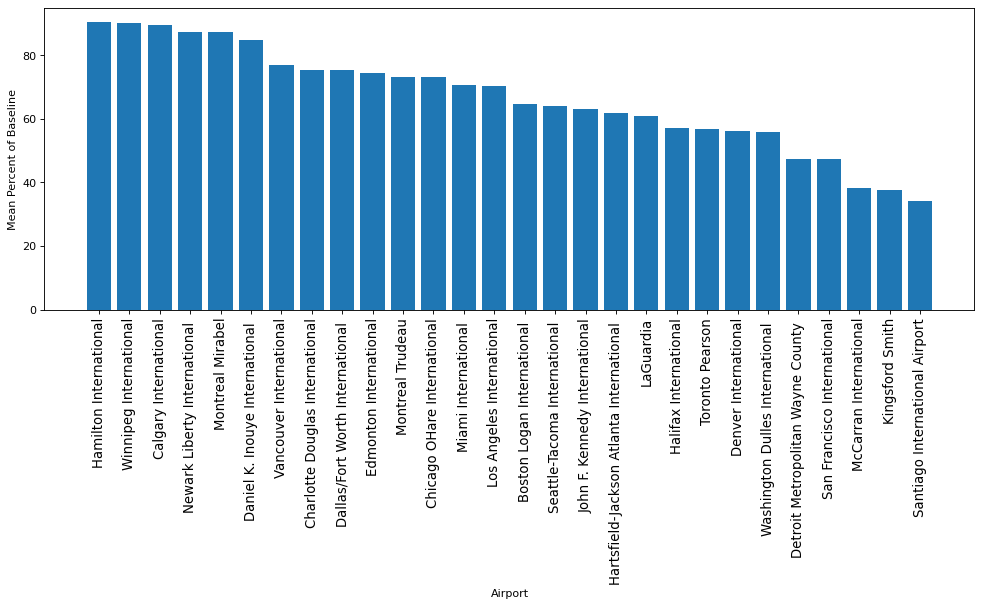

In [21]:
airport_mean = airport_data.groupby(by="AirportName")["PercentOfBaseline"].mean().nlargest(len(df)).reset_index()

plt.figure(figsize=(15,5), dpi=80)

plt.bar(airport_mean["AirportName"], airport_mean["PercentOfBaseline"])
plt.xticks(airport_mean["AirportName"], rotation='vertical', size=12)
plt.ylabel('Mean Percent of Baseline')
plt.xlabel('Airport')
plt.show()

**Hamilton International**, **Winnipeg International**, and **Calgary International** were the airports able to retain the most of the passenger volume during the period. Meanwhile, **McCarran International**, **Kingsford Smith**, and **Santiago International Airport** severely felt the impact of the pandemic.

### 2. Plot the distribution of the PercentOfBaseline per Airport.

Create the **MeanPercentOfBaseline** column for sorting of the data. <br/>
Utilize the `.merge()` method to append the means on each row.

In [22]:
airport_mean.rename(columns={"PercentOfBaseline": "MeanPercentOfBaseline"}, inplace=True)

airport_data_merged = pd.merge(left=airport_data, right=airport_mean, how='left', left_on='AirportName', right_on='AirportName')
airport_data_merged

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography,lat,long,MeanPercentOfBaseline
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.9459774986125,151.180087713813,37.750973
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.9459774986125,151.180087713813,37.750973
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.9459774986125,151.180087713813,37.750973
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.9459774986125,151.180087713813,37.750973
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.9459774986125,151.180087713813,37.750973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7242,Daily,2020-06-05,1.0,Seattle-Tacoma International,80,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,USA,"POLYGON((-122.297594547272 47.434474106872, -1...",47.4505828917119,-122.308661576118,63.980843
7243,Daily,2020-10-03,1.0,Seattle-Tacoma International,55,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,USA,"POLYGON((-122.297594547272 47.434474106872, -1...",47.4505828917119,-122.308661576118,63.980843
7244,Daily,2020-07-16,1.0,Seattle-Tacoma International,76,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,USA,"POLYGON((-122.297594547272 47.434474106872, -1...",47.4505828917119,-122.308661576118,63.980843
7245,Daily,2020-07-31,1.0,Seattle-Tacoma International,69,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,USA,"POLYGON((-122.297594547272 47.434474106872, -1...",47.4505828917119,-122.308661576118,63.980843


Create a boxplot using the **Seaborn** library to show the distribution of the data. The data are sorted according to its mean percent of baseline value.

Text(0.5, 0, 'Airport')

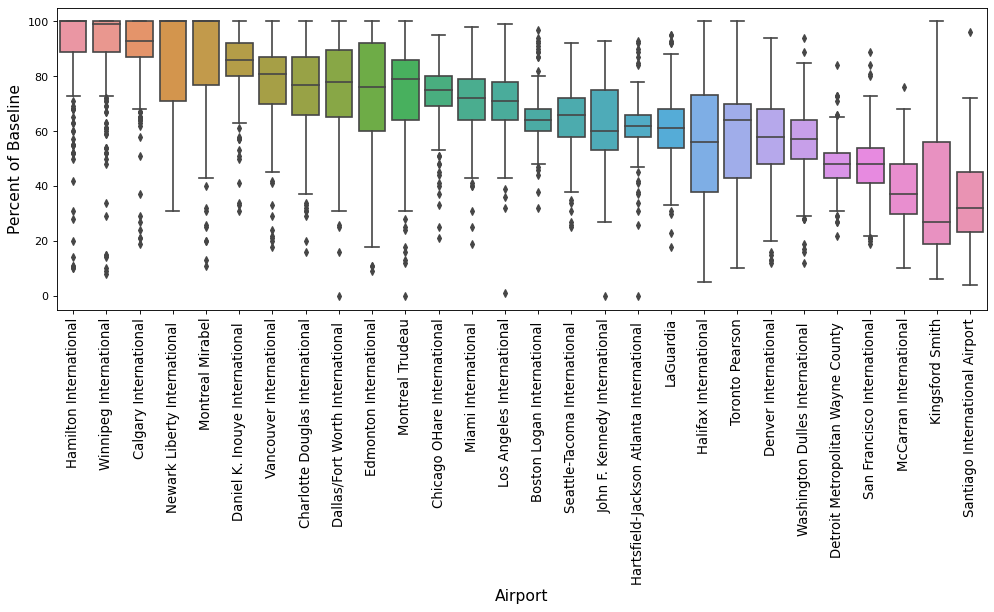

In [23]:
plt.figure(figsize=(15,5), dpi=80)
sns.boxplot(x='AirportName', y='PercentOfBaseline', data=airport_data_merged.sort_values(by="MeanPercentOfBaseline", ascending=False), notch=False)

plt.xticks(rotation='vertical', size=12)
plt.ylabel('Percent of Baseline', size=14)
plt.xlabel('Airport', size=14)

Here we see that regardless of the percent of baseline mean, the airports experienced varying traffic volume during the period. To further analysis, the data will be characterized based on traffic volumes.

### 3. Days with low airport traffic volume (< 20%).

Create a **weekday** column using the **Date** data.

In [24]:
low_traffic = airport_data[airport_data["PercentOfBaseline"]<=25]
low_traffic['weekday'] = low_traffic.loc[:,"Date"].dt.dayofweek
low_traffic

<ipython-input-24-e848ad0377da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_traffic['weekday'] = low_traffic.loc[:,"Date"].dt.dayofweek


,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography,lat,long,weekday
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.9459774986125,151.180087713813,2
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.9459774986125,151.180087713813,5
8,Daily,2020-08-05,1.0,Kingsford Smith,20,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.9459774986125,151.180087713813,2
11,Daily,2020-08-10,1.0,Kingsford Smith,19,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.9459774986125,151.180087713813,0
12,Daily,2020-10-01,1.0,Kingsford Smith,19,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.9459774986125,151.180087713813,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6798,Daily,2020-11-26,1.0,Washington Dulles International,12,POINT(-77.4427728838621 38.9475939204352),Floris,Virginia,US-VA,USA,"POLYGON((-77.4458885192871 38.9760921336351, -...",38.9475939204352,-77.4427728838621,3
6813,Daily,2020-07-04,1.0,Washington Dulles International,16,POINT(-77.4427728838621 38.9475939204352),Floris,Virginia,US-VA,USA,"POLYGON((-77.4458885192871 38.9760921336351, -...",38.9475939204352,-77.4427728838621,5
6877,Daily,2020-05-25,1.0,Washington Dulles International,19,POINT(-77.4427728838621 38.9475939204352),Floris,Virginia,US-VA,USA,"POLYGON((-77.4458885192871 38.9760921336351, -...",38.9475939204352,-77.4427728838621,0
6981,Daily,2020-09-07,1.0,Washington Dulles International,17,POINT(-77.4427728838621 38.9475939204352),Floris,Virginia,US-VA,USA,"POLYGON((-77.4458885192871 38.9760921336351, -...",38.9475939204352,-77.4427728838621,0


Replace the numerical values of the day of week with text equivalent.

In [25]:
weekday_traffic = low_traffic.groupby('weekday')['AirportName'].count().reset_index()
weekday = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
weekday_traffic['weekday'].replace(weekday, inplace=True)
weekday_traffic

,weekday,AirportName
0,Mon,75
1,Tue,25
2,Wed,28
3,Thu,39
4,Fri,35
5,Sat,69
6,Sun,90


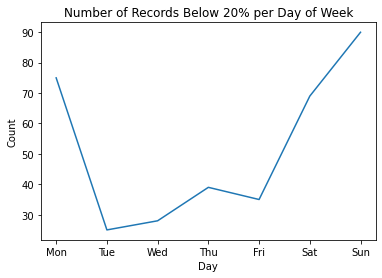

In [26]:
plt.plot(weekday_traffic['weekday'], weekday_traffic['AirportName'])
plt.xlabel('Day')
plt.ylabel('Count')
plt.title("Number of Records Below 20% per Day of Week")
plt.show()

**Saturday to Monday** have the most instances where traffice volume is below 20% of the baseline. <br/>
-The airport management could schedule repairs and other maintenance in these periods. <br/>
-Airlines could try to schedule promo flights during these days.

### 4. Construct a scatter plot of the PercentOfBaseline data.

Filter the Kingsford airport data.

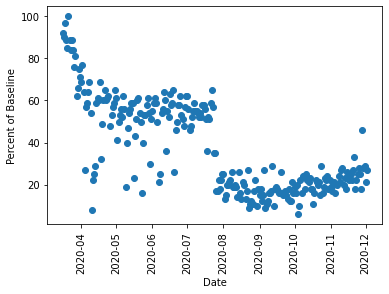

In [27]:
kingsford_data = airport_data.loc[airport_data['AirportName']=='Kingsford Smith',['Date', 'PercentOfBaseline']].sort_values('Date')
#sns.scatterplot(data=kingsford_data, x="Date", y="PercentOfBaseline")
plt.scatter(kingsford_data["Date"], kingsford_data["PercentOfBaseline"])
plt.ylabel('Percent of Baseline')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

Traffic volume in **Apr 2020** had a steep breakdown from the baseline volume. Around **60%** was maintained from **Apr 2020 to Jul 2020** but eventually broke down again and volume hovered around **20%** of the baseline volume.

### 5. Construct a boxplot of the PercentOfBaseline data per Country.

Text(0.5, 0, 'Airport')

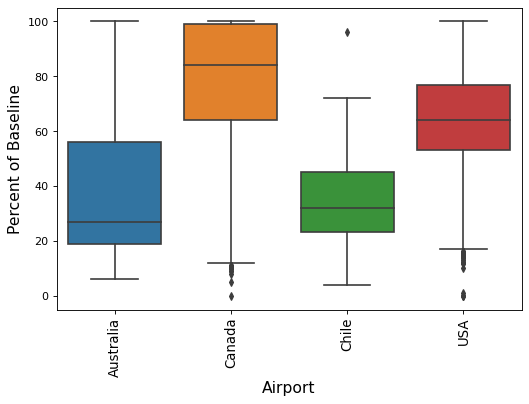

In [32]:
plt.figure(figsize=(7.5,5), dpi=80)
sns.boxplot(x='Country', y='PercentOfBaseline', data=airport_data.sort_values(by='Country'))

plt.xticks(rotation='vertical', size=12)
plt.ylabel('Percent of Baseline', size=14)
plt.xlabel('Airport', size=14)

**Canada** had the highest retained percent of traffic volume among the four countries probably due to less stringent travelling protocols.<br/>